# Problem Statement
The Helmholz is given as
$$
(-\Delta - \frac{\omega^2} {c^{2}}) u = f   \quad \textrm{in}\quad \Omega = [0,1]\times[0,1]
$$
The source term is $f = 0$.

Dirichlet boundary conditions are applied in all four edges
* top edge : 
$$u = {\frac {A}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x - \mu }{\sigma }}\right)^{2}}$$ 
* other edges : $u = 0$

We have parameters $A, \mu, \sigma, c$, and the frequencty $\omega=1000$



In [38]:
include("../src/Util.jl")
include("../src/ShapeFunctions.jl")
include("../src/Element.jl")
include("../src/Domain.jl")
include("../src/Solver.jl")
include("../src/Mesh.jl")

function Box_Dirichlet_To_Neumann(params::Array{Float64, 1}, nex::Int64 = 20, ney::Int64 = 20, porder::Int64 = 2, ngp::Int64 = 3)
    """
    -Δu - ω^2/c^2 u = f  in Ω=[0,1]×[0,1]
    
    boundary condition orders:
    
    bottom N = (0, -1)  
    right  N = (1,  0)  
    top    N = (0,  1) 
    left   N = (-1, 0)  
    
    """
    
    """
    ----- 3 -----
    |           |
    |           |
    4           2
    |           |
    |           |
    ----- 1 -----
    """
    A, mu, sigma, c = params
    bc_types = ["Dirichlet", "Dirichlet", "Dirichlet", "Dirichlet"]
    bc_funcs = [(x,y)-> 0,  (x,y)-> 0, (x,y)-> A/(sigma *sqrt(2*pi)) * exp(-1/(2*sigma^2) * (x - mu)^2), (x,y)-> 0]
    ω = 1000.0
    c_func = (x,y)->  c
    s_func = (x,y)-> 0
    
    Lx, Ly = 1.0, 1.0
    nodes, elnodes, bc_nodes = box(Lx, Ly, nex, ney, porder)
    
    @info "construct domain"
    domain = Domain(nodes, elnodes,
    bc_nodes, bc_types, bc_funcs,
    porder, ngp; 
    ω = ω, 
    c_func = c_func, 
    s_func = s_func)
    
    @info "linear solve"
    domain = solve!(domain)
    
    @info "start visualize"
    visScalarField(domain, domain.state, savefile="Box.png")
    
    DBC_∂u∂n_ele = computeNeumannOnDirichletEdge(domain)
    ∂u∂n_data = computeNeumannOnDirichletNode(domain, DBC_∂u∂n_ele, bc_nodes, bc_types)
    
    fig_disp, ax_disp = PyPlot.subplots(ncols = 4, nrows=1, sharex=false, sharey=true, figsize=(16,4))
    markersize = 1
    for bc_id = 1:4
        bc_id_nodes = bc_nodes[:, bc_id]
        xx, yy = nodes[bc_id_nodes, 1], nodes[bc_id_nodes, 2]
        data_Dirichlet = [bc_funcs[bc_id](xx[i], yy[i]) for i =1:length(xx)]
        data_Neumann = ∂u∂n_data[bc_id, bc_id_nodes]
        if bc_id == 1 || bc_id == 3
            ax_disp[bc_id].plot(xx, data_Dirichlet, "ro", markersize = markersize, label="Dirichlet")
            ax_disp[bc_id].plot(xx, data_Neumann, "go", markersize = markersize, label="Neumann")
            ax_disp[bc_id].set_xlabel("x")
        else
            ax_disp[bc_id].plot(yy, data_Dirichlet, "ro", markersize = markersize, label="Dirichlet")
            ax_disp[bc_id].plot(yy, data_Neumann, "go", markersize = markersize, label="Neumann")
            ax_disp[bc_id].set_xlabel("y")
        end
        ax_disp[bc_id].grid()
    end 
    ax_disp[1].legend()
    fig_disp.tight_layout()
end



Box_Dirichlet_To_Neumann (generic function with 5 methods)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


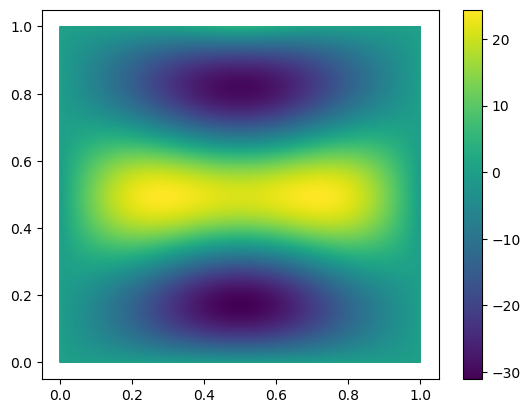

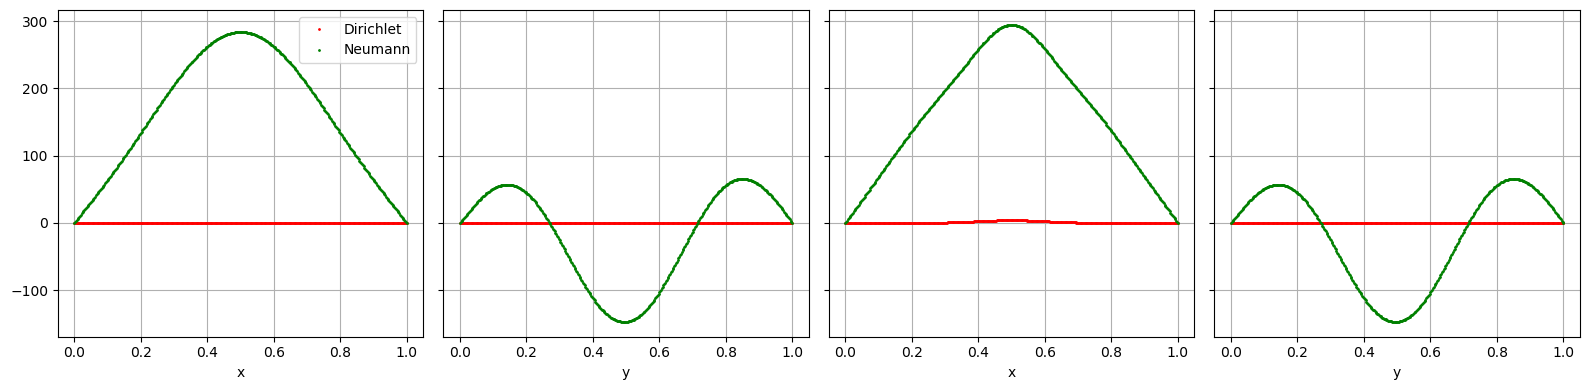

┌ Info: start visualize
└ @ Main In[38]:51


In [39]:
nex = 200 
ney = 200
porder = 2
ngp = 3


# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.5, 0.1, 100  
params = [1.0;0.5;0.1; 100]
Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


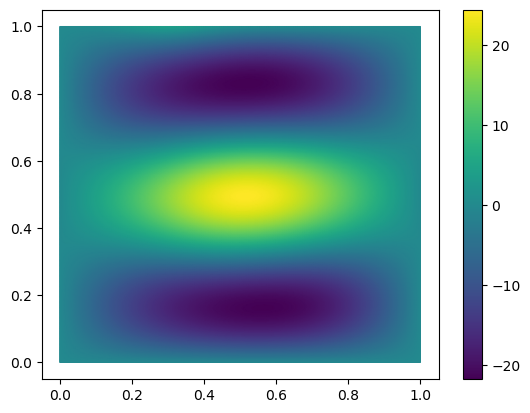

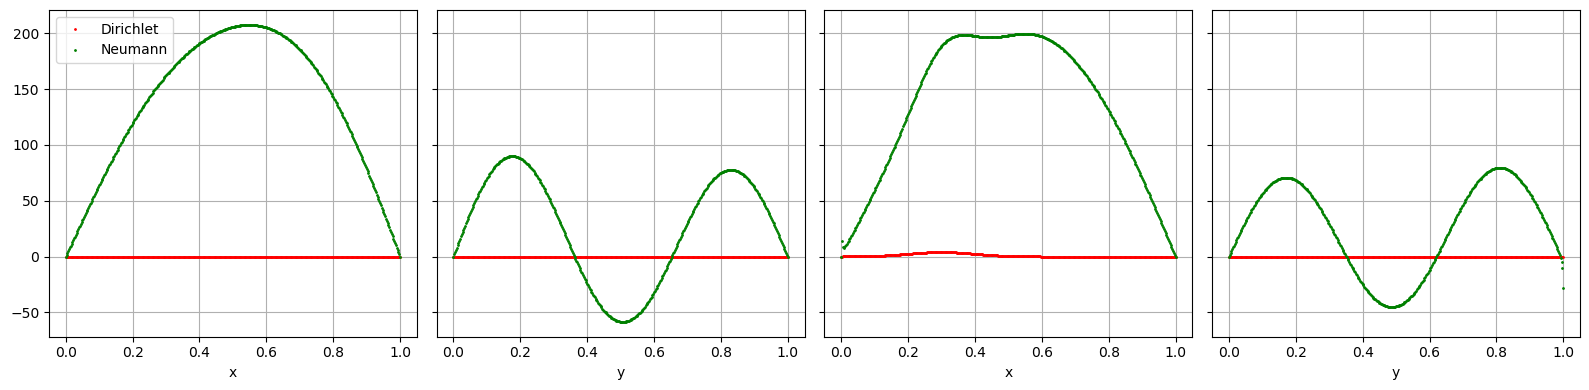

┌ Info: start visualize
└ @ Main In[38]:51


In [40]:
nex = 200 
ney = 200
porder = 2
ngp = 3

# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.3, 0.1, 100  
params = [1.0;0.3;0.1; 100]

Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


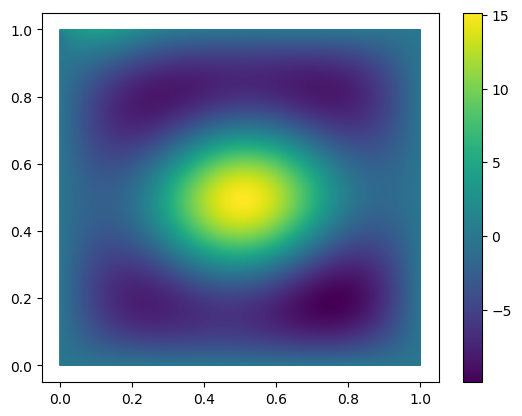

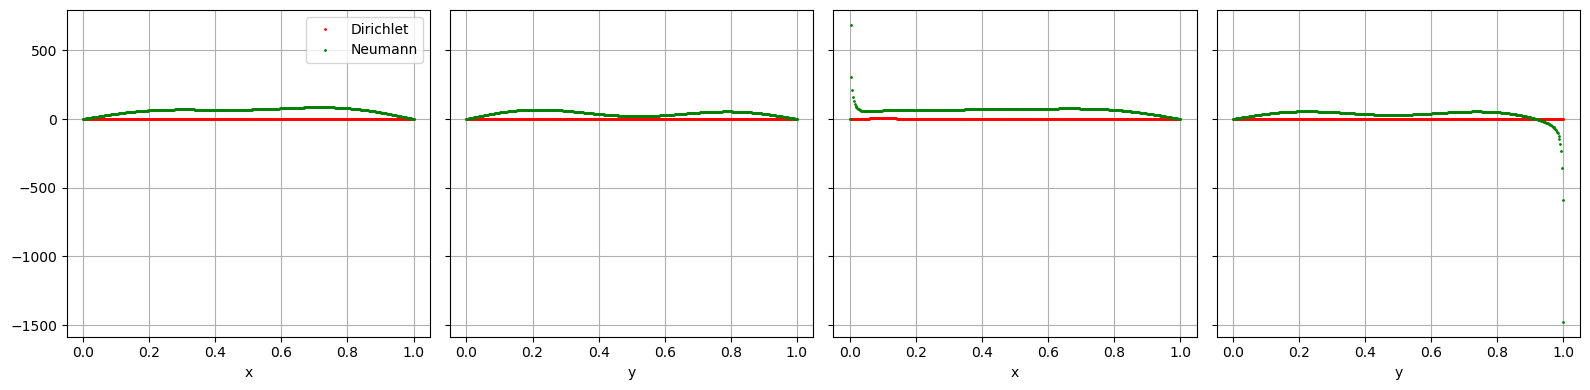

┌ Info: start visualize
└ @ Main In[38]:51


In [41]:
nex = 200 
ney = 200
porder = 2
ngp = 3

# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.1, 0.1, 100  
params = [1.0;0.1;0.1; 100]

Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


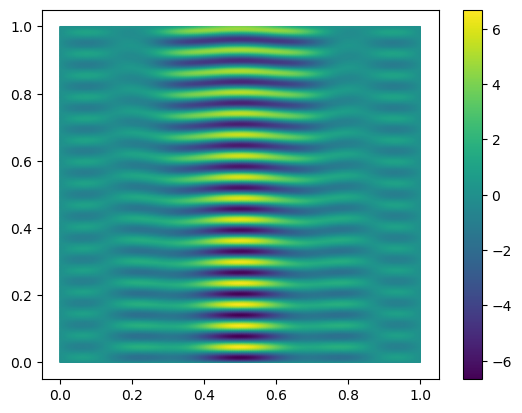

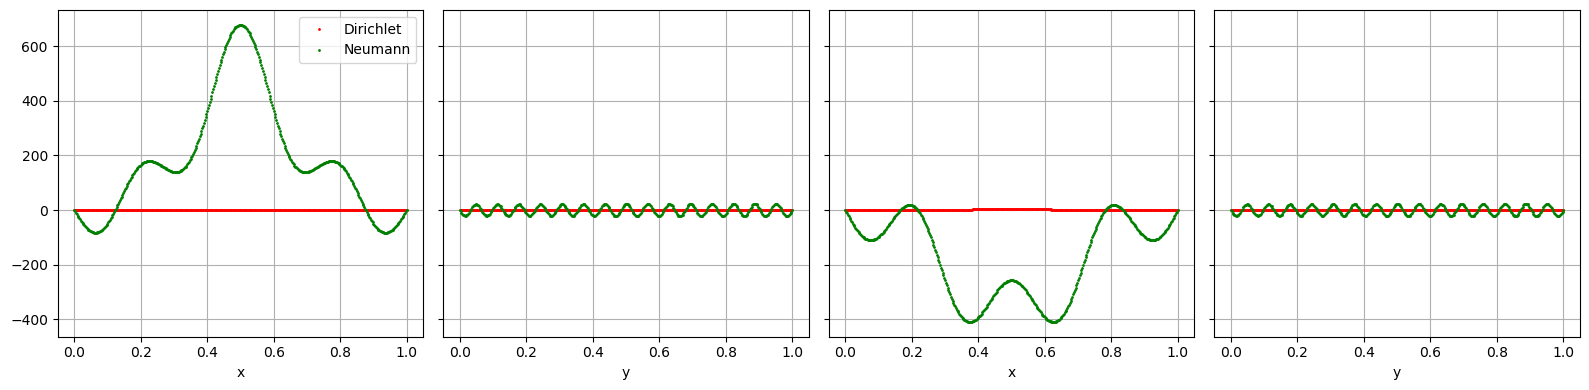

┌ Info: start visualize
└ @ Main In[38]:51


In [42]:
nex = 200 
ney = 200
porder = 2
ngp = 3


# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.5, 0.1, 10  
params = [1.0;0.5;0.1; 10]
Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


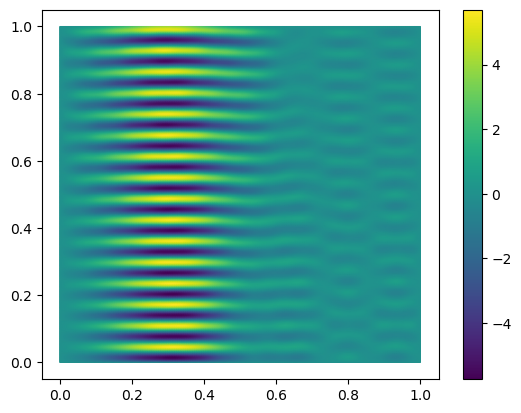

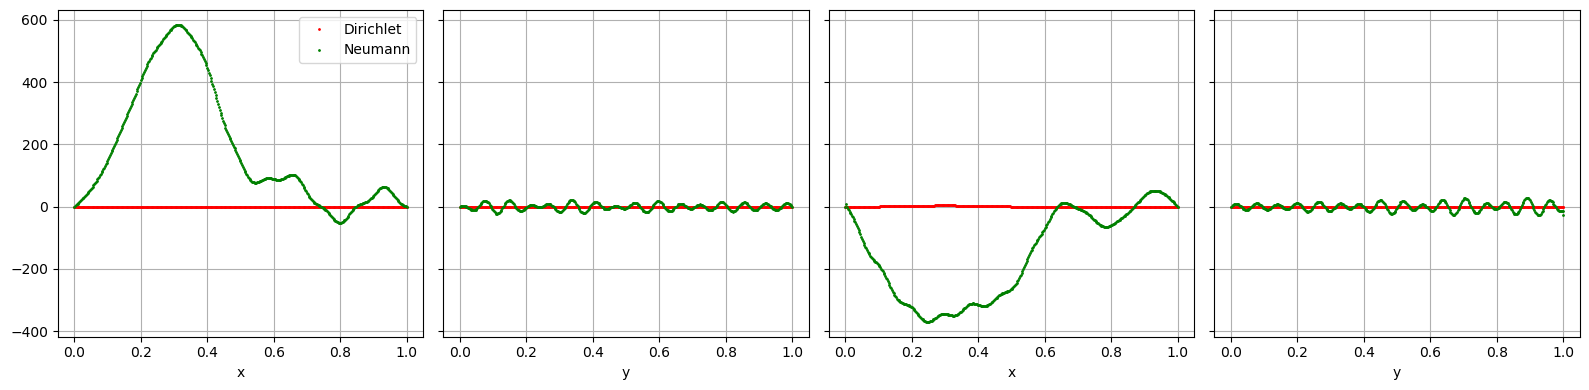

┌ Info: start visualize
└ @ Main In[38]:51


In [43]:
nex = 200 
ney = 200
porder = 2
ngp = 3

# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.3, 0.1, 10  
params = [1.0;0.3;0.1; 10]

Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

┌ Info: construct domain
└ @ Main In[38]:40
┌ Info: linear solve
└ @ Main In[38]:48


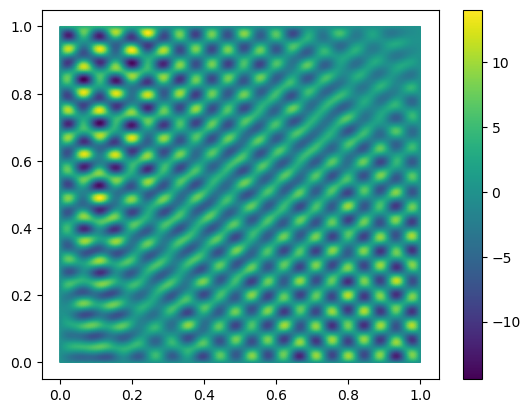

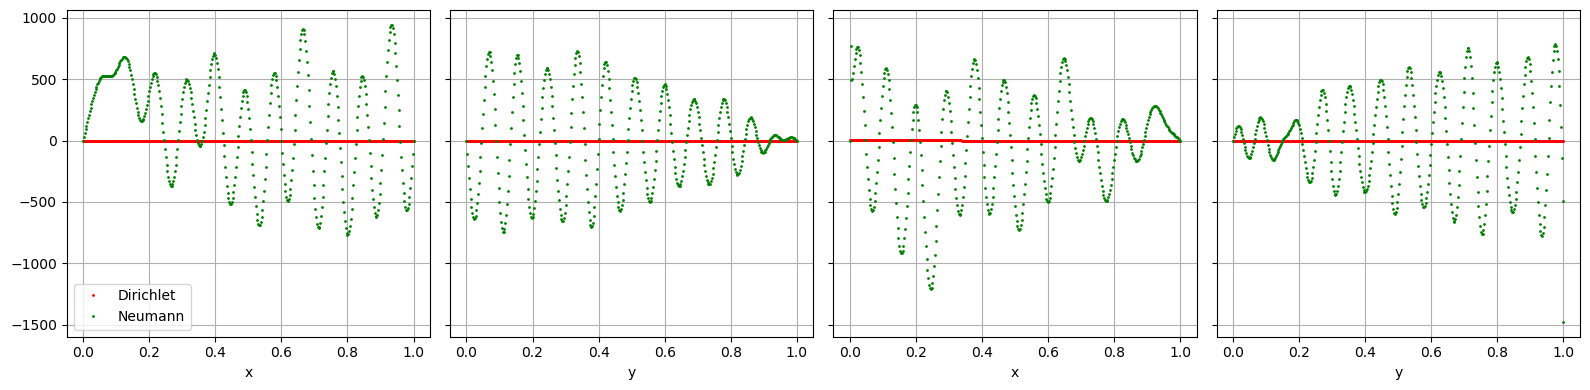

┌ Info: start visualize
└ @ Main In[38]:51


In [44]:
nex = 200 
ney = 200
porder = 2
ngp = 3

# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.1, 0.1, 10  
params = [1.0;0.1;0.1; 10]

Box_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

In [45]:
function Lshape_Dirichlet_To_Neumann(params::Array{Float64, 1}, nex::Int64 = 20, ney::Int64 = 20, porder::Int64 = 2, ngp::Int64 = 3)
    """
    -Δu - ω^2/c^2 u = f  in Ω=[0,1]×[0,1]
    
    boundary condition orders:
    
    bottom N = (0, -1)  
    right  N = (1,  0)  
    top    N = (0,  1) 
    left   N = (-1, 0)  
    
    """
    
    """
    ---5---
    |     |4      
    |     |      
    6     ___3__    
    |           |
    |           |2
    ----- 1 ----
    """
    A, mu, sigma, c = params
    bc_types = ["Dirichlet", "Dirichlet", "Dirichlet", "Dirichlet", "Dirichlet", "Dirichlet"]
    bc_funcs = [(x,y)-> 0,  (x,y)-> 0,  (x,y)-> 0,  (x,y)-> 0, (x,y)-> A/(sigma *sqrt(2*pi)) * exp(-1/(2*sigma^2) * (x - mu)^2),  (x,y)-> 0]
    ω = 1000.0
    c_func = (x,y)->  c
    

    s_func = (x,y)-> 0
    
    Lx, Ly = 1.0, 1.0
    nodes, elnodes, bc_nodes = lshape(Lx, Ly, nex, ney, porder)
    
    @info "construct domain"
    domain = Domain(nodes, elnodes,
    bc_nodes, bc_types, bc_funcs,
    porder, ngp; 
    ω = ω, 
    c_func = c_func, 
    s_func = s_func)
    
    @info "linear solve"
    domain = solve!(domain)
    
    @info "start visualize"
    visScalarField(domain, domain.state, savefile="Lshape.png")
    
    DBC_∂u∂n_ele = computeNeumannOnDirichletEdge(domain)
    ∂u∂n_data = computeNeumannOnDirichletNode(domain, DBC_∂u∂n_ele, bc_nodes, bc_types)
    
    fig_disp, ax_disp = PyPlot.subplots(ncols = 6, nrows=1, sharex=false, sharey=true, figsize=(16,4))
    markersize = 1
    for bc_id = 1:6
        bc_id_nodes = bc_nodes[:, bc_id]
        xx, yy = nodes[bc_id_nodes, 1], nodes[bc_id_nodes, 2]
        data_Dirichlet = [bc_funcs[bc_id](xx[i], yy[i]) for i =1:length(xx)]
        data_Neumann = ∂u∂n_data[bc_id, bc_id_nodes]
        if bc_id == 1 || bc_id == 3 || bc_id == 5
            ax_disp[bc_id].plot(xx, data_Dirichlet, "ro", markersize = markersize, label="Dirichlet")
            ax_disp[bc_id].plot(xx, data_Neumann, "go", markersize = markersize, label="Neumann")
            ax_disp[bc_id].set_xlabel("x")
        else
            ax_disp[bc_id].plot(yy, data_Dirichlet, "ro", markersize = markersize, label="Dirichlet")
            ax_disp[bc_id].plot(yy, data_Neumann, "go", markersize = markersize, label="Neumann")
            ax_disp[bc_id].set_xlabel("y")
        end
        ax_disp[bc_id].grid()
    end 
    ax_disp[1].legend()
    fig_disp.tight_layout()
end



Lshape_Dirichlet_To_Neumann (generic function with 5 methods)

┌ Info: construct domain
└ @ Main In[45]:35
┌ Info: linear solve
└ @ Main In[45]:43


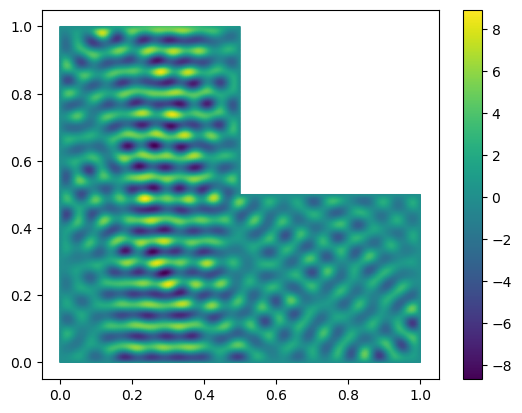

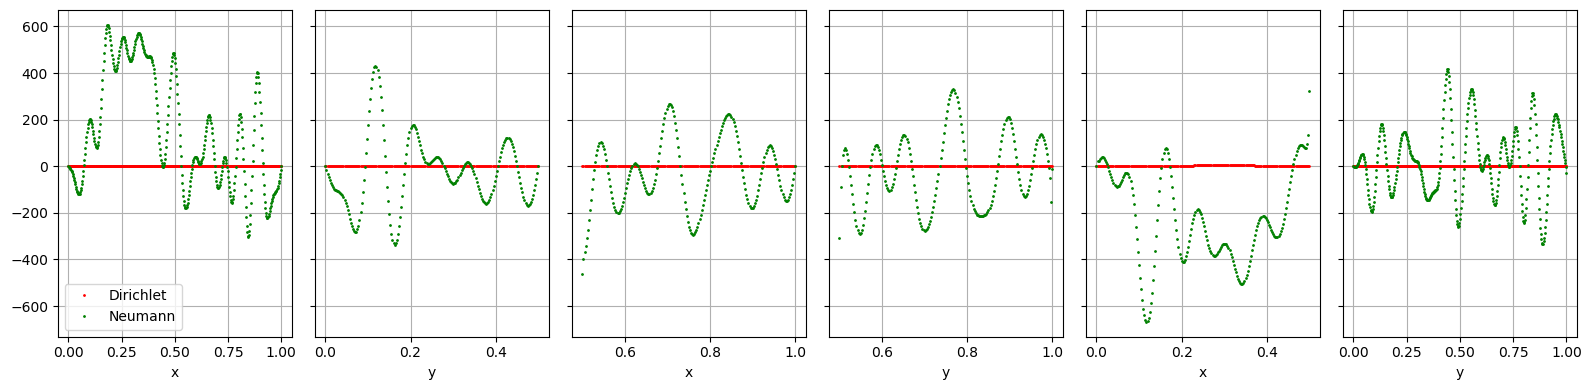

┌ Info: start visualize
└ @ Main In[45]:46


In [46]:

nex = 200 
ney = 200
porder = 2
ngp = 3

# 𝐴,𝜇,𝜎,𝑐 = 1.0, 0.3, 0.1, 10  
params = [1.0;0.3;0.1; 10]

Lshape_Dirichlet_To_Neumann(params, nex, ney, porder, ngp)

In [49]:
function Ring_Dirichlet_To_Neumann(params::Array{Float64, 1}, neθ::Int64 = 20, ner::Int64 = 20, porder::Int64 = 2, ngp::Int64 = 3)
    """
    -Δu - ω^2/c^2 u = f  in Ω=[0,2π]×[1,2]
    
    boundary condition orders:
    
    inner   N = -(x, y)/sqrt(x^2 + y^2)
    outter  N = (x, y)/sqrt(x^2 + y^2)
    
        ****2****
      *           * 
    *    *  *  *    * 
    *    *  1  *    * 
    *    *  *  *   *
      *           *
        *********
    """
    bc1, bc2, c = params
    bc_types = ["Dirichlet", "Dirichlet"]

    # (x,y)-> bc1*sin(θ),  (x,y)-> bc2*sin(θ)
    bc_funcs = [(x,y)-> bc1*y/sqrt(x^2 + y^2),  (x,y)-> bc2*y/sqrt(x^2 + y^2)]
    ω = 0.0
    c_func = (x,y)->  c
    s_func = (x,y)-> 1
    

    r, R = 1.0, 2.0
    nodes, elnodes, bc_nodes = ring(r, R, neθ, ner, porder)
    
    @info "construct domain"
    domain = Domain(nodes, elnodes,
    bc_nodes, bc_types, bc_funcs,
    porder, ngp; 
    ω = ω, 
    c_func = c_func, 
    s_func = s_func)
    
    @info "linear solve"
    domain = solve!(domain)
    
    @info "start visualize"
    visScalarField(domain, domain.state, savefile="Ring.png")
    
    DBC_∂u∂n_ele = computeNeumannOnDirichletEdge(domain)
    ∂u∂n_data = computeNeumannOnDirichletNode(domain, DBC_∂u∂n_ele, bc_nodes, bc_types)
    
    fig_disp, ax_disp = PyPlot.subplots(ncols = 2, nrows=1, sharex=false, sharey=true, figsize=(8,4))
    markersize = 1
    for bc_id = 1:2
        bc_id_nodes = bc_nodes[:, bc_id]
        xx, yy = nodes[bc_id_nodes, 1], nodes[bc_id_nodes, 2]
        data_Dirichlet = [bc_funcs[bc_id](xx[i], yy[i]) for i =1:length(xx)]
        data_Neumann = ∂u∂n_data[bc_id, bc_id_nodes]

        ax_disp[bc_id].plot(atan.(yy,xx), data_Dirichlet, "ro", markersize = markersize, label="Dirichlet")
        ax_disp[bc_id].plot(atan.(yy,xx), data_Neumann, "go", markersize = markersize, label="Neumann")
        ax_disp[bc_id].set_xlabel("θ")
        ax_disp[bc_id].grid()

    end 
    ax_disp[1].legend()
    fig_disp.tight_layout()
end



Ring_Dirichlet_To_Neumann (generic function with 5 methods)

┌ Info: construct domain
└ @ Main In[47]:31
┌ Info: linear solve
└ @ Main In[47]:39


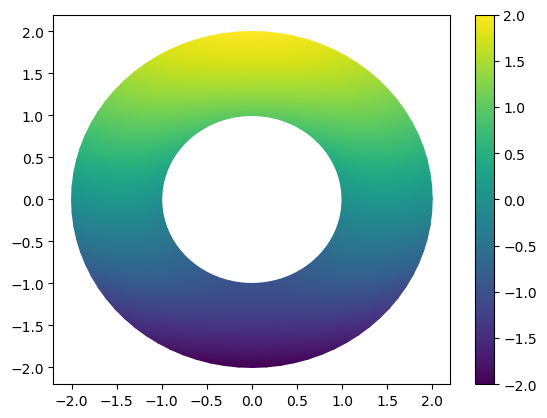

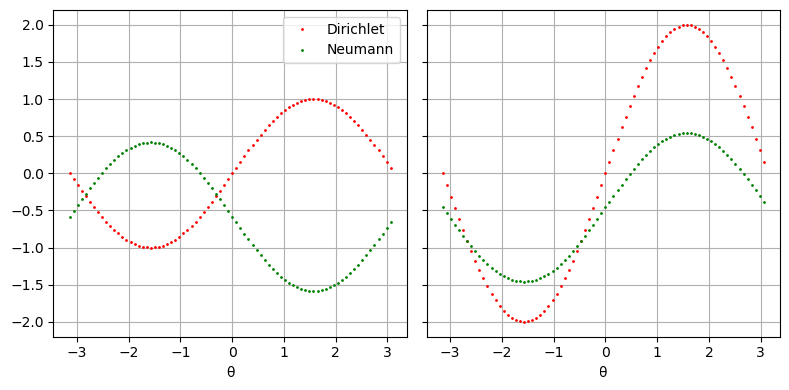

┌ Info: start visualize
└ @ Main In[47]:42


In [48]:
neθ = 40
ner = 20
porder = 2
ngp = 3
params = [1.0;2.0; 334]
Ring_Dirichlet_To_Neumann(params, neθ, ner, porder, ngp)